In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0106/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 467 ms, sys: 19.2 ms, total: 486 ms
Wall time: 488 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.011059,0.0,-0.011711,0.000000,-0.006434,0.013630,0.023057,0.684786,0.307315,...,0.0,-0.006937,0.0,-0.012997,2.686574e-02,-0.003969,2.686574e-02,0.003821,0.0,0.041906
1,0.0,-0.000721,0.0,-0.023931,0.000000,-0.009816,0.013184,0.034139,0.668336,0.282799,...,0.0,0.004067,0.0,-0.003655,0.000000e+00,-0.001443,0.000000e+00,0.005188,0.0,-0.029113
2,0.0,-0.011211,0.0,-0.010141,0.000000,-0.004349,0.000004,0.012422,0.557181,0.243788,...,0.0,0.001726,0.0,-0.006297,0.000000e+00,-0.007833,0.000000e+00,-0.010131,0.0,-0.018714
3,0.0,0.002511,0.0,0.000202,0.000000,-0.000347,0.007963,0.004623,0.682453,0.410303,...,0.0,-0.002479,0.0,-0.004772,3.540014e-07,-0.000397,1.334030e-07,0.002856,0.0,-0.011333
4,0.0,0.002829,0.0,-0.004357,0.000637,-0.000890,0.663987,0.018957,0.002376,0.436213,...,0.0,0.000529,0.0,-0.004696,0.000000e+00,0.003811,0.000000e+00,-0.005399,0.0,-0.002852


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.000000,0.013630,0.684786,0.000070,0.0,0.0,0.0,0.000000e+00,...,0.0,3.421241e-11,4.806623e-07,6.707872e-09,0.0,0.0,0.0,2.686574e-02,2.686574e-02,0.0
1,0.0,0.0,0.000000,0.013184,0.668336,0.000068,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.0,0.0,0.000000,0.000004,0.557181,0.042056,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.0,0.0,0.000000,0.007963,0.682453,0.000153,0.0,0.0,0.0,0.000000e+00,...,0.0,2.882791e-04,2.225325e-03,1.226370e-09,0.0,0.0,0.0,3.540014e-07,1.334030e-07,0.0
4,0.0,0.0,0.000637,0.663987,0.002376,0.000000,0.0,0.0,0.0,3.902047e-07,...,0.0,1.660674e-06,5.186155e-02,1.227432e-03,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.000000,0.013723,0.983347,0.000070,0.0,0.0,0.0,0.000000e+00,...,0.0,3.421241e-11,4.806624e-07,6.707872e-09,0.0,0.0,0.0,2.722988e-02,2.722988e-02,0.000000e+00
1,0.0,0.0,0.000000,0.013271,0.950988,0.000068,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2,0.0,0.0,0.000000,0.000004,0.745744,0.042952,0.0,0.0,0.0,0.000000e+00,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,0.0,0.0,0.000000,0.007995,0.978726,0.000153,0.0,0.0,0.0,0.000000e+00,...,0.0,2.883206e-04,2.227803e-03,1.226370e-09,0.0,0.0,0.0,3.540014e-07,1.334030e-07,0.000000e+00
4,0.0,0.0,0.000637,0.942521,0.002379,0.000000,0.0,0.0,0.0,3.902048e-07,...,0.0,1.660675e-06,5.322992e-02,1.228185e-03,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
5,0.0,0.0,0.000000,0.472769,0.472769,0.000000,0.0,0.0,0.0,3.276872e-05,...,0.0,2.422680e-08,1.736007e-06,1.235649e-10,0.0,0.0,0.0,1.074720e-05,1.315611e-03,2.159415e-07
6,0.0,0.0,0.000000,0.000142,0.210626,0.000532,0.0,0.0,0.0,1.711851e-03,...,0.0,0.000000e+00,4.419209e-04,2.317986e-04,0.0,0.0,0.0,2.415051e-05,4.604263e-05,0.000000e+00


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    38.999667
1    38.999989
2    45.000000
3    39.986887
4    42.999997
5    47.996502
6    38.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.011059,-0.011711,-0.006434,0.023057,0.307315,0.082303,-0.003458,-0.009384,-0.005043,-0.006397,...,0.015116,0.081970,0.061933,-0.019810,0.053991,-0.006937,-0.012997,-0.003969,0.003821,0.041906
1,-0.000721,-0.023931,-0.009816,0.034139,0.282799,0.074472,0.024351,-0.003330,-0.001869,-0.007852,...,0.005411,0.050315,0.019649,0.000503,0.017850,0.004067,-0.003655,-0.001443,0.005188,-0.029113
2,-0.011211,-0.010141,-0.004349,0.012422,0.243788,0.091486,0.003216,-0.003914,-0.002781,-0.005782,...,0.017729,0.049813,0.020205,-0.012574,-0.001859,0.001726,-0.006297,-0.007833,-0.010131,-0.018714
3,0.002511,0.000202,-0.000347,0.004623,0.410303,0.015683,0.015710,0.012163,0.010706,-0.007935,...,0.029888,0.064319,0.141913,-0.011042,-0.003328,-0.002479,-0.004772,-0.000397,0.002856,-0.011333
4,0.002829,-0.004357,-0.000890,0.018957,0.436213,-0.037028,0.018005,0.005821,-0.000167,-0.006525,...,0.020627,0.042633,0.153664,-0.012509,0.008382,0.000529,-0.004696,0.003811,-0.005399,-0.002852


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.010998,-0.011643,-0.006414,0.023325,0.359769,0.085784,-0.003452,-0.009340,-0.005030,-0.006376,...,0.015231,0.085423,0.063891,-0.019615,0.055475,-0.006913,-0.012913,-0.003962,0.003828,0.042796
1,-0.000721,-0.023647,-0.009768,0.034729,0.326838,0.077315,0.024649,-0.003325,-0.001867,-0.007821,...,0.005426,0.051603,0.019843,0.000503,0.018011,0.004075,-0.003649,-0.001442,0.005202,-0.028693
2,-0.011149,-0.010090,-0.004340,0.012499,0.276074,0.095802,0.003221,-0.003906,-0.002777,-0.005765,...,0.017887,0.051075,0.020410,-0.012496,-0.001857,0.001727,-0.006277,-0.007802,-0.010080,-0.018540
3,0.002515,0.000202,-0.000347,0.004633,0.507274,0.015806,0.015834,0.012237,0.010763,-0.007904,...,0.030339,0.066432,0.152476,-0.010982,-0.003323,-0.002476,-0.004761,-0.000397,0.002860,-0.011269
4,0.002833,-0.004347,-0.000890,0.019138,0.546838,-0.036351,0.018168,0.005838,-0.000167,-0.006504,...,0.020841,0.043555,0.166098,-0.012431,0.008417,0.000529,-0.004685,0.003818,-0.005385,-0.002848
5,0.003625,0.002313,0.005589,0.000649,0.461176,0.052071,0.017792,0.011990,0.006949,-0.002351,...,0.018577,0.045580,0.093939,0.003351,-0.004479,0.006212,-0.001131,0.000810,0.003888,0.004258
6,-0.003240,-0.006353,-0.003254,-0.009379,0.530947,0.051836,0.012774,0.004388,0.002253,-0.007793,...,0.020490,0.022085,0.092230,0.002235,-0.013549,-0.000399,-0.003655,-0.003343,-0.001818,-0.007762


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.000000,0.0,0.023325,0.359769,0.085784,0.000000,0.000000,0.000000,0.0,...,0.015231,0.085423,0.063891,0.000000,0.055475,0.000000,0.0,0.000000,0.003828,0.042796
1,0.000000,0.000000,0.0,0.034729,0.326838,0.077315,0.024649,0.000000,0.000000,0.0,...,0.005426,0.051603,0.019843,0.000503,0.018011,0.004075,0.0,0.000000,0.005202,0.000000
2,0.000000,0.000000,0.0,0.012499,0.276074,0.095802,0.003221,0.000000,0.000000,0.0,...,0.017887,0.051075,0.020410,0.000000,0.000000,0.001727,0.0,0.000000,0.000000,0.000000
3,0.002515,0.000202,0.0,0.004633,0.507274,0.015806,0.015834,0.012237,0.010763,0.0,...,0.030339,0.066432,0.152476,0.000000,0.000000,0.000000,0.0,0.000000,0.002860,0.000000
4,0.002833,0.000000,0.0,0.019138,0.546838,0.000000,0.018168,0.005838,0.000000,0.0,...,0.020841,0.043555,0.166098,0.000000,0.008417,0.000529,0.0,0.003818,0.000000,0.000000


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    26.563293
1    26.964180
2    28.537070
3    25.175956
4    22.574472
5    28.233648
6    26.180245
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0106_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0106_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0106_true_and_forecasted_values_df

,True_count,Forecasted_count
0,38.999667,26.563293
1,38.999989,26.964180
2,45.000000,28.537070
3,39.986887,25.175956
4,42.999997,22.574472
5,47.996502,28.233648
6,38.000000,26.180245


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

15.75434136125097

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

15.393453908270635

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.3230254820884732, pvalue=0.4797721075793765)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-19.824194709613256

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 256 ms, sys: 74.8 ms, total: 331 ms
Wall time: 332 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.01343334,  0.00224161, -0.01063454, ...,  0.0073663 ,
         0.00793016, -0.00362611],
       [-0.01031202,  0.00549102, -0.0115692 , ...,  0.00695002,
         0.00533545, -0.00388336],
       [-0.01039678,  0.00322199, -0.01261729, ...,  0.00754476,
         0.00687826, -0.00493443],
       ...,
       [-0.01406413,  0.00082791, -0.0073514 , ...,  0.00721633,
         0.00339031, -0.0020467 ],
       [-0.01400518, -0.00017965, -0.00706047, ...,  0.00456023,
         0.00338924, -0.0017727 ],
       [-0.01382124,  0.00109005, -0.0083766 , ...,  0.00450182,
         0.00357795, -0.00063652]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 19.9 ms, sys: 608 µs, total: 20.5 ms
Wall time: 19.9 ms


In [52]:
loaded_npy_files[0]

array([[0.        , 0.00224161, 0.        , ..., 0.0073663 , 0.00793016,
        0.        ],
       [0.        , 0.00549102, 0.        , ..., 0.00695002, 0.00533545,
        0.        ],
       [0.        , 0.00322199, 0.        , ..., 0.00754476, 0.00687826,
        0.        ],
       ...,
       [0.        , 0.00082791, 0.        , ..., 0.00721633, 0.00339031,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00456023, 0.00338924,
        0.        ],
       [0.        , 0.00109005, 0.        , ..., 0.00450182, 0.00357795,
        0.        ]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[40.016663, 34.550472, 39.47803 , ..., 32.684345, 31.135914,
        31.416279],
       [32.425053, 31.903494, 33.925835, ..., 26.952904, 34.897423,
        35.78412 ],
       [45.302105, 40.62773 , 39.823013, ..., 44.87191 , 45.56542 ,
        47.354824],
       ...,
       [31.899052, 34.374157, 37.110634, ..., 34.725193, 39.132458,
        38.73843 ],
       [33.069088, 34.854965, 45.563114, ..., 41.892334, 40.361828,
        36.61063 ],
       [32.969246, 39.508392, 44.03366 , ..., 36.912334, 47.145447,
        42.88328 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[40.016663, 34.550472, 39.47803 , ..., 32.684345, 31.135914,
        31.416279],
       [32.425053, 31.903494, 33.925835, ..., 26.952904, 34.897423,
        35.78412 ],
       [45.302105, 40.62773 , 39.823013, ..., 44.87191 , 45.56542 ,
        47.354824],
       ...,
       [31.899052, 34.374157, 37.110634, ..., 34.725193, 39.132458,
        38.73843 ],
       [33.069088, 34.854965, 45.563114, ..., 41.892334, 40.361828,
        36.61063 ],
       [32.969246, 39.508392, 44.03366 , ..., 36.912334, 47.145447,
        42.88328 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[23.84508204],
       [23.1618804 ],
       [22.67097864],
       [21.89112988],
       [20.60313721],
       [23.91471844],
       [22.78670325]])

In [63]:
ui_train

array([[43.65846605],
       [42.32140617],
       [45.11602736],
       [44.53522472],
       [42.8288785 ],
       [46.74450102],
       [48.86002026]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

22.17012774603707

In [66]:
y_traina = block_0106_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[38.99966683],
       [38.99998931],
       [44.99999976],
       [39.98688736],
       [42.99999732],
       [47.99650174],
       [37.99999993]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([32.940754, 32.42305 , 33.468445, 32.748714, 30.592524, 34.72128 ,
       33.96844 ], dtype=float32)

In [71]:
sum_forecasted_values

0    26.563293
1    26.964180
2    28.537070
3    25.175956
4    22.574472
5    28.233648
6    26.180245
dtype: float64

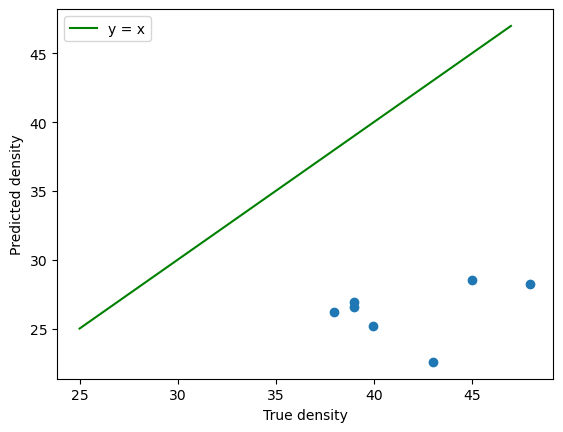

In [72]:
plt.scatter(block_0106_true_and_forecasted_values_df['True_count'], block_0106_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([25, 47], [25, 47], color='green', label='y = x')
plt.legend()
plt.show()

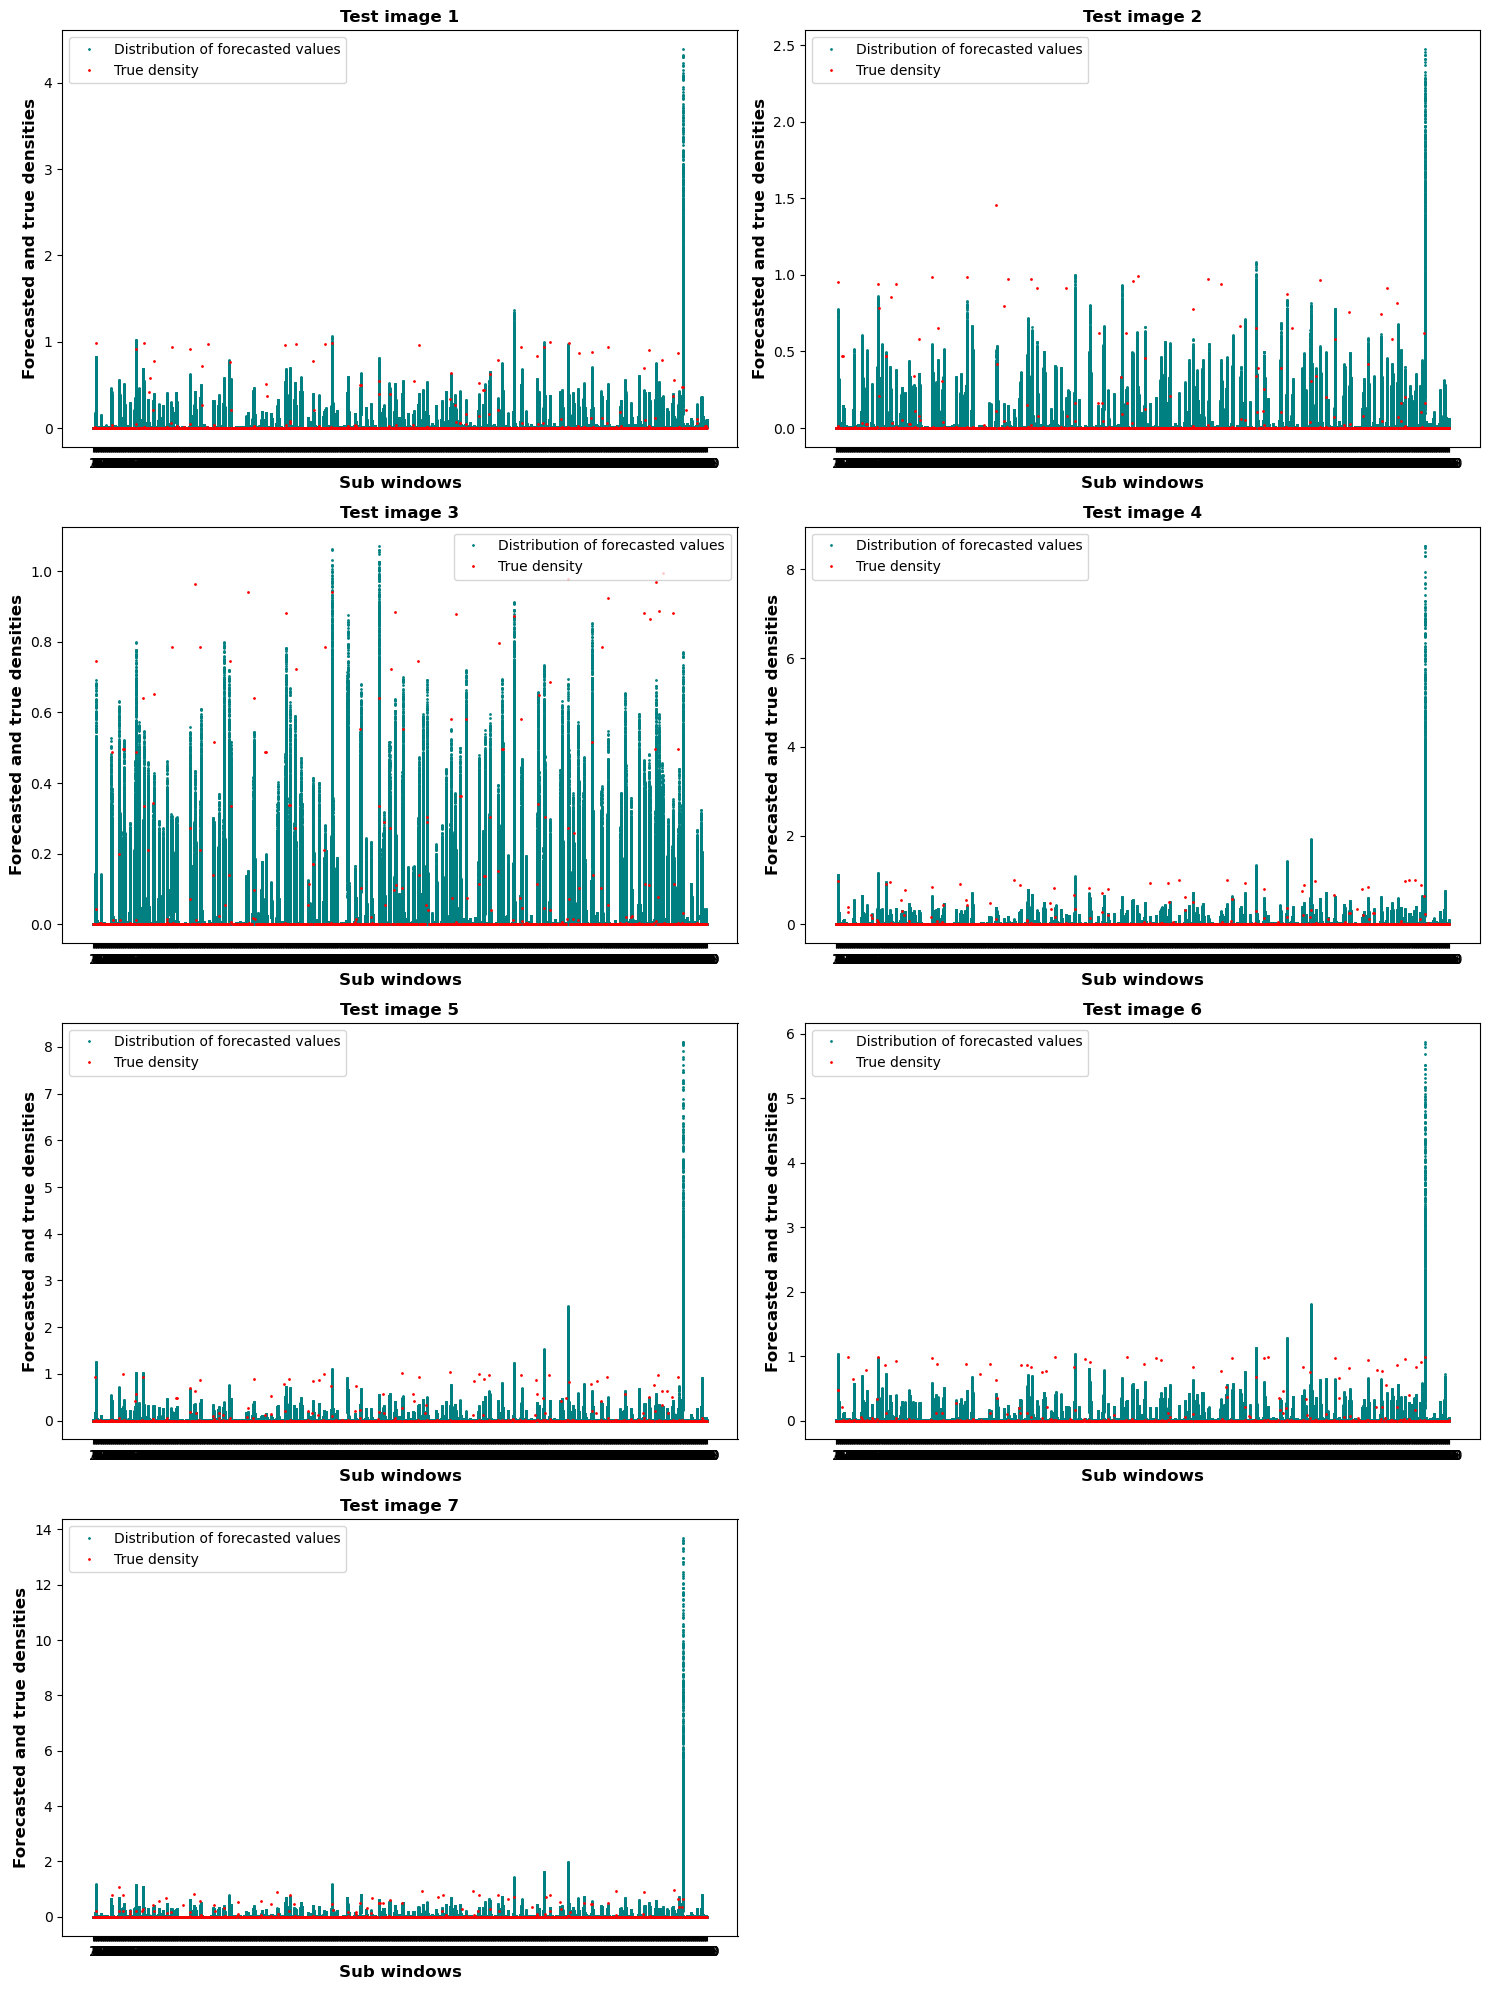

CPU times: user 30.3 s, sys: 892 ms, total: 31.2 s
Wall time: 30.8 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 